In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
file_path = r"C:\Users\Martijn\Downloads\archive\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


In [5]:
# 1. **Frequency Tables**:
#     - Generate a frequency table for the product `category`.
#     - Which are the top 5 most listed product categories?

df["category"].value_counts().nlargest(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

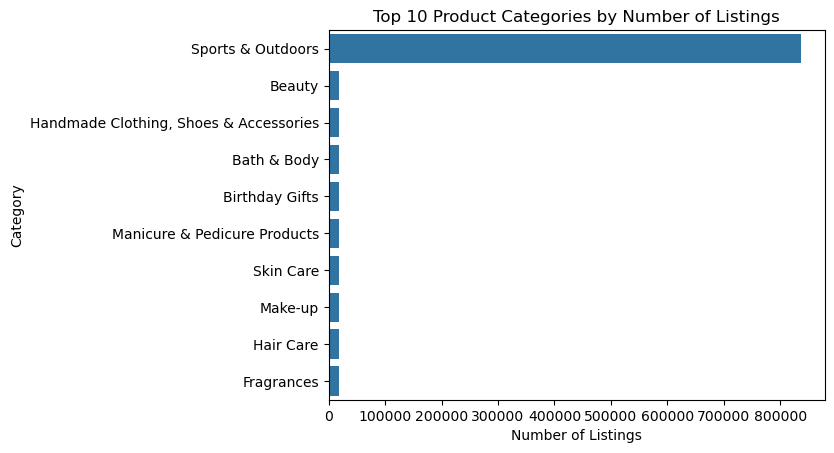

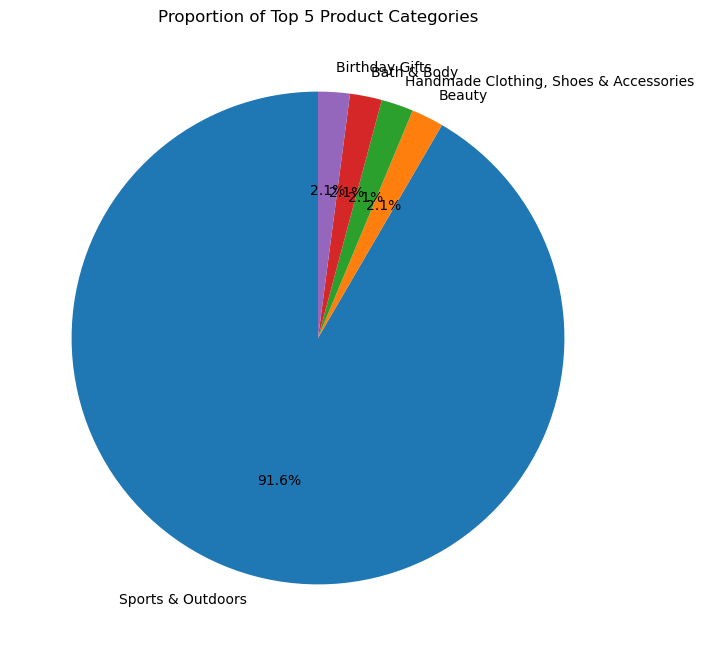

In [6]:
# 2. **Visualizations**:
#     - Display the distribution of products across different categories using a bar chart. 
# *If you face problems understanding the chart, do it for a subset of top categories.*
#     - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

# Display the distribution of products across different categories using a bar chart
category_counts = df["category"].value_counts().nlargest(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.pyplot.xlabel('Number of Listings')
plt.pyplot.ylabel('Category')
plt.pyplot.title('Top 10 Product Categories by Number of Listings')
plt.pyplot.show()

# For a subset of top categories, visualize their proportions using a pie chart
top_categories = df["category"].value_counts().nlargest(5)
top_categories.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.pyplot.title('Proportion of Top 5 Product Categories')
plt.pyplot.ylabel('')
plt.pyplot.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [7]:
# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `price` of products.
#     - What's the average price point of products listed? 
# How does this compare with the most common price point (mode)?

print(df["price"].mean())
print(df["price"].mode())
print(df["price"].median())


89.24380943923663
0    9.99
Name: price, dtype: float64
19.09


345.60886175352226
119445.48532256528
0.25     9.99
0.75    45.99
Name: price, dtype: float64


<Axes: xlabel='price'>

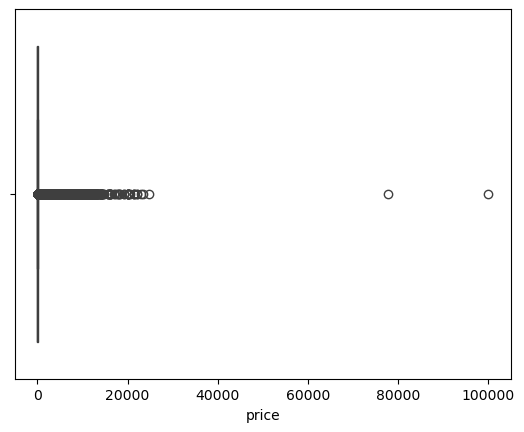

In [8]:
# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, range, and interquartile range for product `price`.
#     - How varied are the product prices? Are there any indicators of a significant spread in prices?
print(df["price"].std())
print(df["price"].var())
print(df["price"].quantile([0.25, 0.75]))
sns.boxplot(df,x="price")


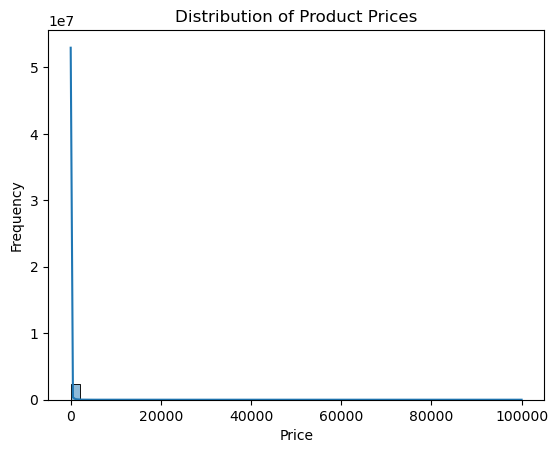

In [10]:
# 3. **Visualizations**:
#     - Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices. 
# *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
#     - Are there products that are priced significantly higher than the rest? -> Yes
# Use a box plot to showcase the spread and potential outliers in product pricing. -> above

# Plot a histogram to visualize the distribution of product prices
sns.histplot(df["price"], bins=50, kde=True)
plt.pyplot.xlabel('Price')
plt.pyplot.ylabel('Frequency')
plt.pyplot.title('Distribution of Product Prices')
plt.pyplot.show()


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [16]:
# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `rating` of products.
#     - How do customers generally rate products? Is there a common trend?
print(df["stars"].mean())
print(df["stars"].mode()[0])
print(df["stars"].median())

df_no0 = df[df["stars"] != 0]

print(df_no0["stars"].mean())
print(df_no0["stars"].mode()[0])
print(df_no0["stars"].median())

2.152836472966065
0.0
0.0
4.31916076222691
4.5
4.4


In [18]:
# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, and interquartile range for product `rating`.
#     - Are the ratings consistent, or is there a wide variation in customer feedback?

print(df_no0["stars"].var())
print(df_no0["stars"].std())
print(df_no0["stars"].quantile([0.25,0.75]))

0.3083433752380519
0.5552867504614637
0.25    4.1
0.75    4.6
Name: stars, dtype: float64


-2.3795681122127945
9.78193769066435


<Axes: xlabel='stars', ylabel='Count'>

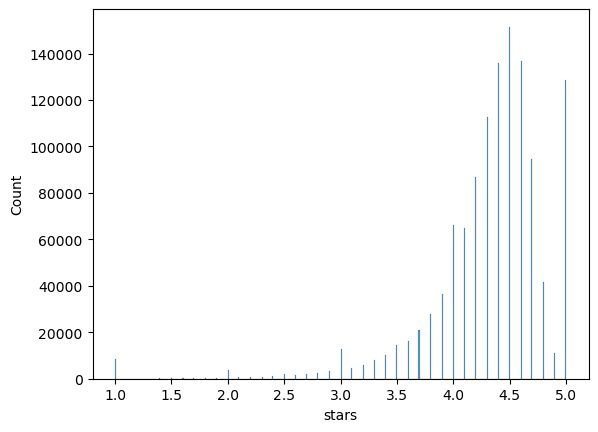

In [ ]:
# 3. **Shape of the Distribution**:
#     - Calculate the skewness and kurtosis for the `rating` column. 
#     - Are the ratings normally distributed, or do they lean towards higher or lower values?

print(df_no0["stars"].skew()) # -> negative -> left skewed
print(df_no0["stars"].kurtosis()) # very high -> a lot of outliers
sns.histplot(df_no0, x="stars")